In [41]:
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
%matplotlib inline

In [42]:
data = pd.read_csv("cardekho_data.csv")

In [43]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [44]:
print(data.columns.values)

['Car_Name' 'Year' 'Selling_Price' 'Present_Price' 'Kms_Driven'
 'Fuel_Type' 'Seller_Type' 'Transmission' 'Owner']


In [45]:
data.shape

(301, 9)

In [46]:
print(data.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [48]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


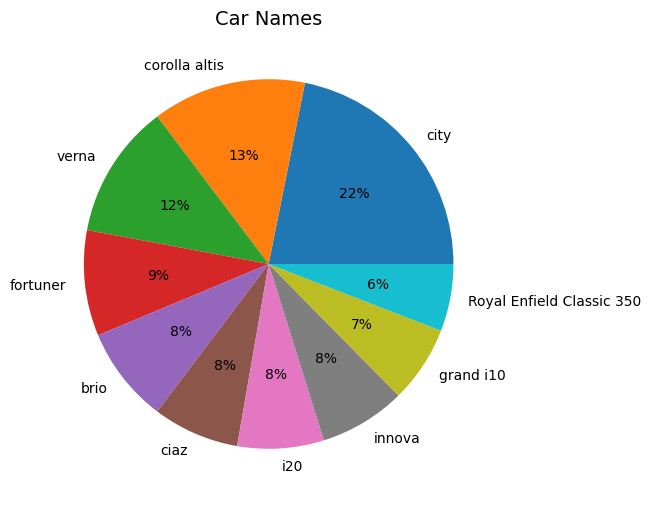

In [49]:
plt.figure(figsize=(8,6))
top_cars_name = data["Car_Name"].value_counts().nlargest(10)
labels = top_cars_name.index
plt.pie(top_cars_name,labels=labels,autopct='%.f%%')
plt.title("Car Names", fontsize=14)
plt.show()

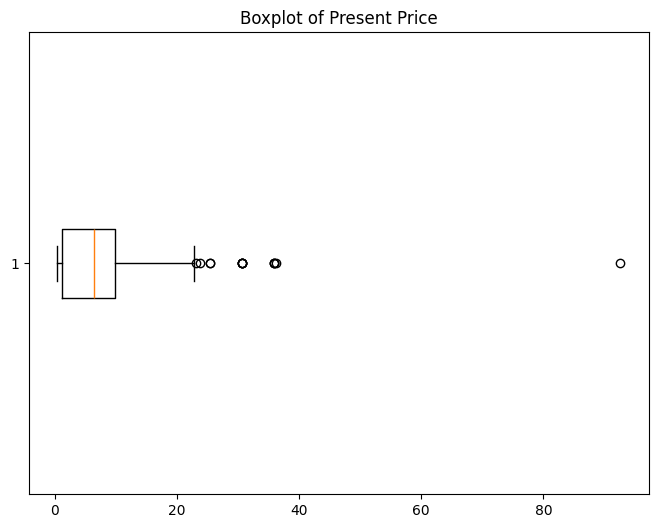

In [50]:
plt.figure(figsize=(8,6))
plt.boxplot(data["Present_Price"],vert=False)
plt.title("Boxplot of Present Price")
plt.show()

In [51]:
Q1 = data['Present_Price'].quantile(0.25)
Q3 = data['Present_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filtering out the outliers
data = data[(data['Present_Price'] >= lower_bound) & (data['Present_Price'] <= upper_bound)]

# Displaying the filtered DataFrame without outliers
print(data)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

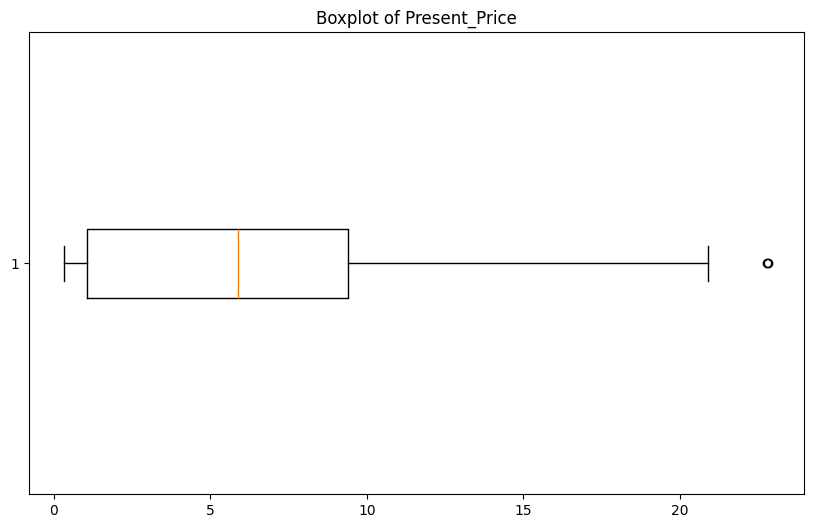

In [52]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['Present_Price'], vert=False)
plt.title('Boxplot of Present_Price')
plt.show()

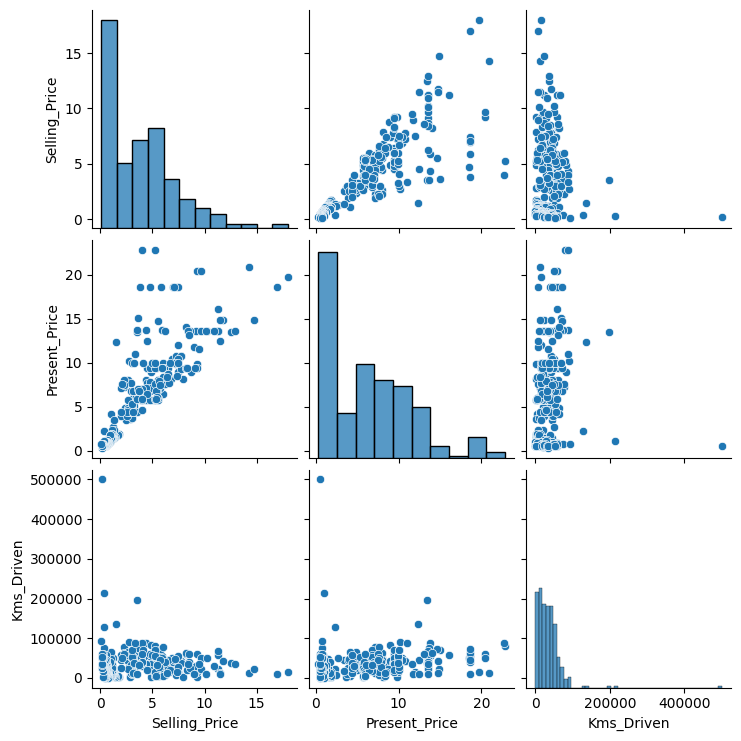

In [53]:
#import warnings

#warnings.filterwarnings("ignore",category=FutureWarning)

numerical_features = ['Selling_Price','Present_Price','Kms_Driven']
sns.pairplot(data[numerical_features])
plt.show()

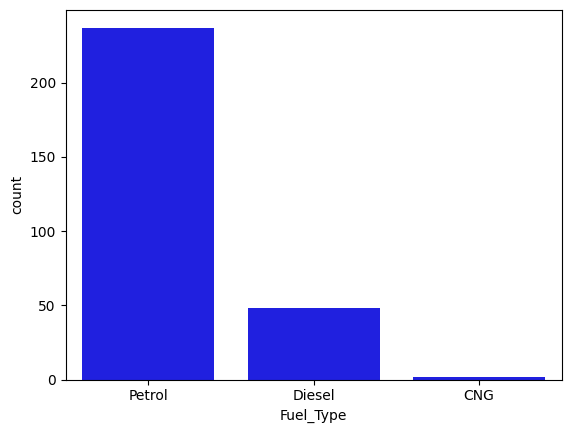

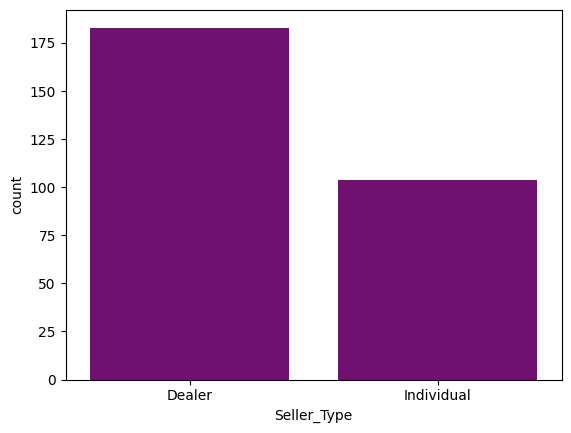

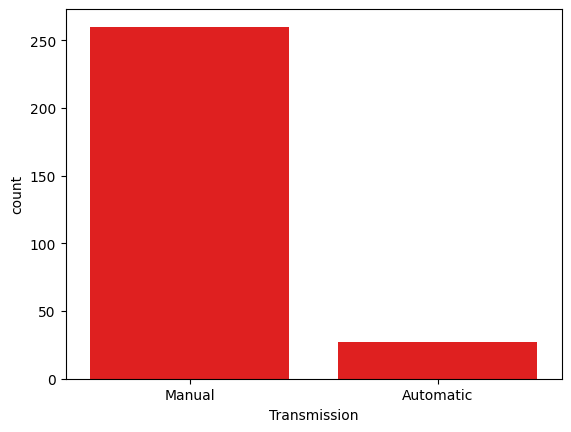

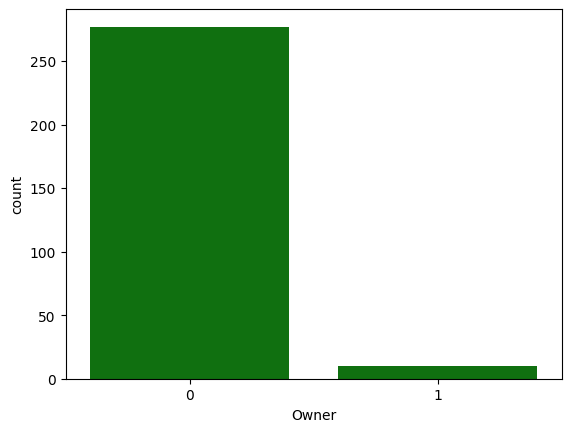

In [54]:
CF = ['Fuel_Type','Seller_Type','Transmission','Owner']
colors = ['blue','purple','red','green']
for feature,color in zip(CF,colors):
    sns.countplot(x=feature,data=data,color=color)
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

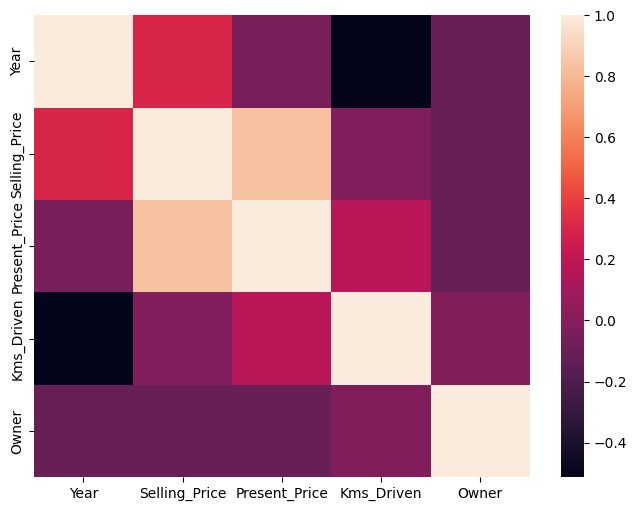

In [55]:
numeric_data = data.select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr())
plt.show

In [56]:
data = pd.get_dummies(data, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score

In [58]:
X = data.drop(['Selling_Price', 'Car_Name'], axis=1)
y = data['Selling_Price']

In [59]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
model = RandomForestRegressor(random_state=42)
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.9119560701851491

In [61]:
ypred = model.predict(Xtest)

In [62]:

mse = mean_squared_error(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 1.1332766348275887
Mean Absolute Error: 0.5932068965517252
R2 Score: 0.9119560701851491


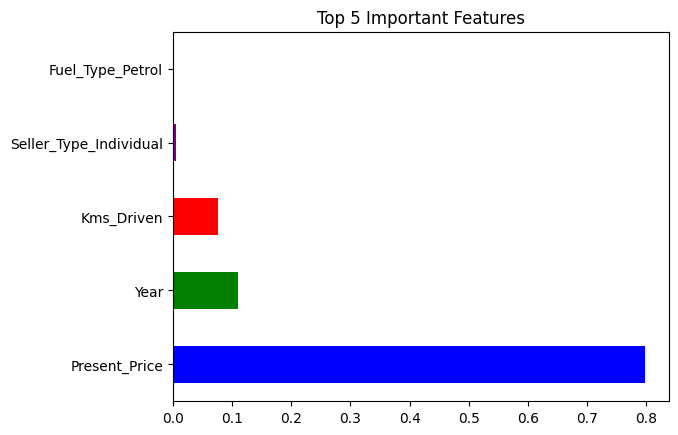

In [63]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

top_5_features = feature_importance.nlargest(5)

colors = ['blue', 'green', 'red', 'purple', 'orange']

top_5_features.plot(kind='barh',color=colors)
plt.title("Top 5 Important Features")
plt.show()

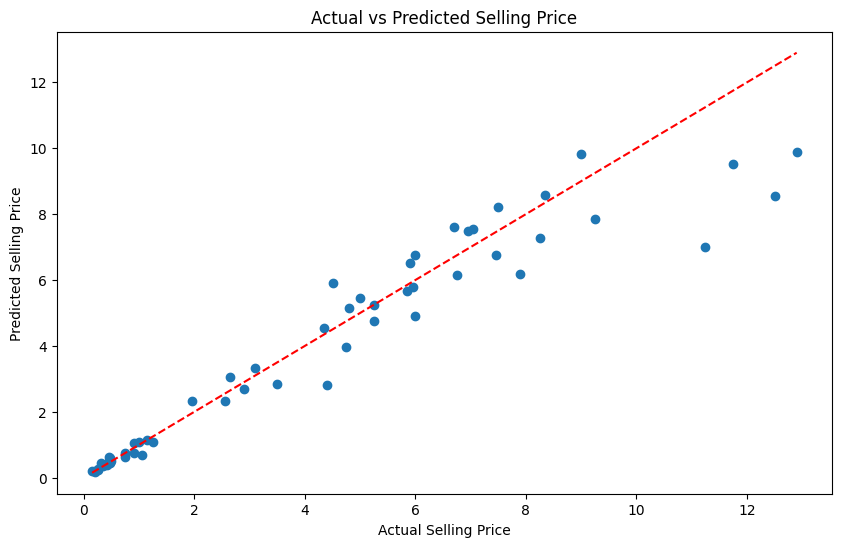

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, ypred)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='--', color='red')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()

In [67]:
data.to_csv("used cars.csv")